# Linear Regression (Baseline)

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import pandas as pd
import joblib 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from faa_p2.config import CLEAN_DATA_FILE, MODELS, LR, MODEL_RESULTS_FILE
warnings.filterwarnings("ignore")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load and scale the data

In [21]:
df = pd.read_csv(CLEAN_DATA_FILE, index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
scaler = StandardScaler()

y = df["medv"]
x = df.drop(columns=["medv"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Model configurations & training

In [23]:
key = LR
config = MODELS[key]

model = config["class"]()
model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Predictions

In [24]:
y_pred = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

Residuals visualizations

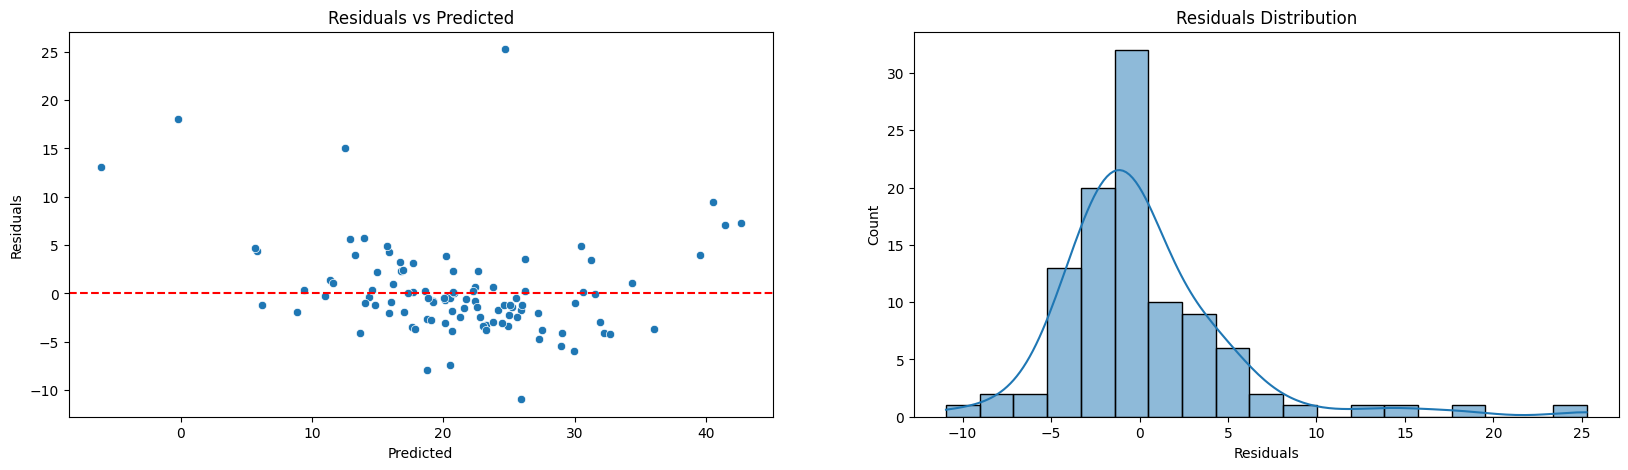

In [25]:
residuals = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

# Residuals vs Fitted
sns.scatterplot(x=y_pred, y=residuals, ax=ax1)
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Residuals")
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title("Residuals vs Predicted")

# Histogram
sns.histplot(residuals, kde=True, ax=ax2)
ax2.set_xlabel("Residuals")
ax2.set_title("Residuals Distribution")
plt.show()

Linear Regression visualization and metrics

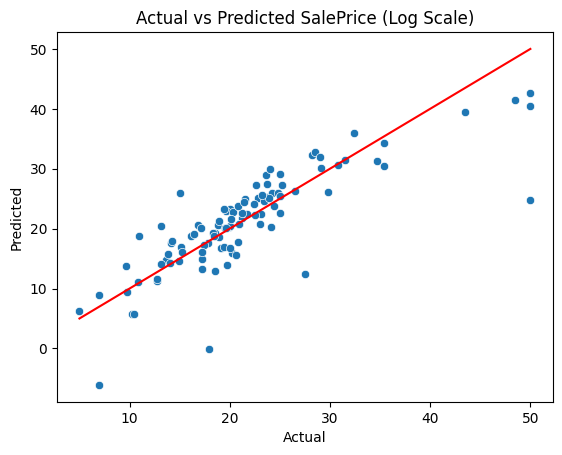

In [26]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted SalePrice (Log Scale)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')   
plt.show()

In [51]:
res_df = pd.DataFrame()

res_df["model"] = [config["name"]]

# train metrics
res_df["train_mae"] = [mean_absolute_error(y_train, y_pred_train)]
res_df["train_rmse"] = [root_mean_squared_error(y_train, y_pred_train)]
res_df["train_r2"] = [r2_score(y_train, y_pred_train)]

# test metrics
res_df["test_mae"] = [mean_absolute_error(y_test, y_pred)]
res_df["test_rmse"] = [root_mean_squared_error(y_test, y_pred)]
res_df["test_r2"] = [r2_score(y_test, y_pred)]

# Difference in performance (RMSE)
res_df["rmse_gap"] = [(res_df["test_rmse"] - res_df["train_rmse"]).values[0]]
res_df.to_csv(MODEL_RESULTS_FILE)
res_df


,model,train_mae,train_rmse,train_r2,test_mae,test_rmse,test_r2,rmse_gap
0,Linear Regression,3.314772,4.652033,0.750886,3.189092,4.928602,0.668759,0.276569


Save the model

In [49]:
save_file = joblib.dump(model, config["filename"])